<div style="text-align: right"> Brian Wiley <br/>
EN.705.601.3VL.SP20 Applied Machine Learning </div>

## Assignment 4
### Applied Machine Learning

__1. [70 pts] By using at least 4 classifiers and 5 different hyper-parameter settings for each,
generate operating points and plot them on ROC. Do not hesitate to use/modify the ROC
plot code in the module notebook. In case you do not see enough variety in Pd-Pf you
might need to work on the classifiers set and/or hyper parameters. And do not hesitate to
try hundreds if necessary, since the ROC is just a natural scatter plot. (Recommend linear
SVM, RBF SVM, logistic regression, random forest, etc.)__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("assignment04_mushroom_dataset.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
## check how many categories in each column
print(df.nunique(axis=0, dropna=True))
## check datatypes
print(df.dtypes)

## convert to categories
df = pd.DataFrame(data=df.select_dtypes(include=['object']).apply(pd.Series.astype, dtype='category'),
                  columns=df.columns)
df.head()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                o

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn.preprocessing import OrdinalEncoder

X = df.loc[:, df.columns != 'class']
y = df.loc[:, df.columns == 'class']

## encode X for CategoricalNB
encoderX = OrdinalEncoder()
encoderX.fit(X)
X_encoded = encoderX.transform(X)

## encode y for CategoricalNB
encoder_y = OrdinalEncoder()
encoder_y.fit(y)
y_encoded = encoder_y.transform(y).ravel()

In [4]:
## sanity check compare counts for first column in X
print([(i, c) for i, c in enumerate(encoderX.categories_[0])])
print()
print(np.unique(X_encoded[:,0], return_counts=True))
print()
print(df["cap-shape"].value_counts())
print("\n")

## sanity check compare counts for y
print([(i, c) for i, c in enumerate(encoder_y.categories_[0])])
print()
print(np.unique(y, return_counts=True))
print()
print(df["class"].value_counts())

[(0, 'b'), (1, 'c'), (2, 'f'), (3, 'k'), (4, 's'), (5, 'x')]

(array([0., 1., 2., 3., 4., 5.]), array([ 452,    4, 3152,  828,   32, 3656], dtype=int64))

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


[(0, 'e'), (1, 'p')]

(array(['e', 'p'], dtype=object), array([4208, 3916], dtype=int64))

e    4208
p    3916
Name: class, dtype: int64


In [5]:
print(df.isnull().any())

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool


In [6]:
## Test CategoricalNB without hyperparams

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import CategoricalNB

## for CategoricalNB 
## split train, test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.8, random_state=99)

cnb_classifier = CategoricalNB()
cnb_classifier.fit(X_train, y_train)
y_pred = cnb_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[3348   10]
 [ 366 2776]]
0.9421538461538461


In [7]:
## Do ROC for LinearSVC with multiple C_values
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

X_ohe = pd.get_dummies(X)

FPR, TPR = [], []
C = np.logspace(-4, 4, 9)

## create 5 cross-fold splits
kfold = KFold(n_splits=5, shuffle=False)

## need to convert pd dataframe to np array to index in k-fold
X_ohe_np = np.array(X_ohe)


for c in C:
    ## since we are doing k-fold we are using arrays to average the confusion matrices and accuracies
    confusion_matrices = []
    accuracies = []
    linSVC = LinearSVC(C=c, random_state=99, max_iter=10000)
    #accuracies = cross_validate(linSVC, X_ohe, y_encoded, cv=kfold, scoring='accuracy')
    for train_ind, test_ind in kfold.split(X_ohe):
        X_train, X_test = X_ohe_np[train_ind], X_ohe_np[test_ind]
        y_train, y_test = y_encoded[train_ind], y_encoded[test_ind]
        linSVC.fit(X_train, y_train)
        y_pred = linSVC.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
        accuracies.append(accuracy_score(y_test, y_pred))
    ## using mean of confusion matrices    
    tn, fp, fn, tp = np.mean(confusion_matrices, axis=0).ravel()
    mu = np.mean(accuracies)
    sd = np.std(accuracies)
    
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]
    print(f'mean accuracy = {mu:.3f} {chr(177)}{sd:.4f}, C={c:7.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')


mean accuracy = 0.910 ±0.0856, C=0.00010, TPR 0.839, FPR 0.024
mean accuracy = 0.911 ±0.0819, C=0.00100, TPR 0.906, FPR 0.084
mean accuracy = 0.968 ±0.0321, C=0.01000, TPR 0.979, FPR 0.041
mean accuracy = 0.994 ±0.0105, C=0.10000, TPR 0.996, FPR 0.009
mean accuracy = 0.997 ±0.0052, C=1.00000, TPR 0.999, FPR 0.004
mean accuracy = 1.000 ±0.0000, C=10.00000, TPR 1.000, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean accuracy = 1.000 ±0.0000, C=100.00000, TPR 1.000, FPR 0.000
mean accuracy = 1.000 ±0.0000, C=1000.00000, TPR 1.000, FPR 0.000
mean accuracy = 1.000 ±0.0000, C=10000.00000, TPR 1.000, FPR 0.000


#### As you can from the results above, we are not going to get an ROC curve that looks like the ones based on thresholds by Sklearn.  Let's plot the curve.

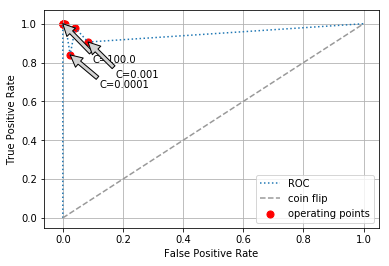

In [8]:
def annot_C(C, x, y):
    plt.annotate(f"C={C}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))
    
## plot the ROC for LinearSVC
FPR, TPR, C = zip(*sorted(zip(FPR, TPR, C)))
fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr, tpr, ':', label='ROC')
plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
annot_C(C[1], FPR[1], TPR[1])
annot_C(C[6], FPR[6], TPR[6])
annot_C(C[8], FPR[8], TPR[8])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Let's try straight scatter plot with many points.  This time for k-fold I won't even do average to get as many points as possible (3 X 25 points).

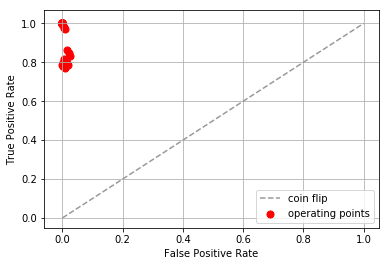

In [9]:
def roc_plot_scatter(FPR, TPR):
    ## zip, sort, no need for area
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

    ## Plot
    fig, ax = plt.subplots()
    plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
    plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

    ## Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
FPR, TPR = [], []
C = np.logspace(-20, 4, 25)

## create 3 cross-fold splits and shuffle
kfold = KFold(n_splits=3, shuffle=True)

## need to convert pd dataframe to np array to index in k-fold
X_ohe_np = np.array(X_ohe)

## this time for k-fold I won't even do average to get as many points as possible (3 X 25 points)
for c in C:
    linSVC = LinearSVC(C=c, random_state=99, max_iter=10000)
    #accuracies = cross_validate(linSVC, X_ohe, y_encoded, cv=kfold, scoring='accuracy')
    for train_ind, test_ind in kfold.split(X_ohe):
        X_train, X_test = X_ohe_np[train_ind], X_ohe_np[test_ind]
        y_train, y_test = y_encoded[train_ind], y_encoded[test_ind]
        linSVC.fit(X_train, y_train)
        y_pred = linSVC.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]
        FPR += [fp/(fp+tn)]
        #print(f'Accuracy = {linSVC.score(X_test, y_test):.3f}, C={c:7.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

roc_plot_scatter(FPR, TPR)

As we can see from the graph the TPR has a lot a points around 0.8 and then jumps up to being really accurate.
#### This is typically how ROC curves are used using threasholds.  

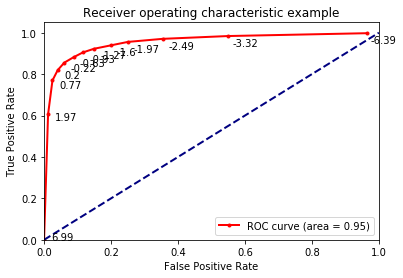

6.99
6.9887269306568625
[6.9887269306568625, 5.9887269306568625, 5.663118013010201, 5.625912375961735, 5.6138552662159, 5.588732699288636, 5.566641884206732, 5.551553022615538, 5.018118150472201, 5.013803829087851]
[6.98872693 5.98872693 5.66311801 5.62591238 5.61385527 5.5887327
 5.56664188 5.55155302 5.01811815 5.01380383]


In [10]:
from sklearn.metrics import roc_curve, auc

def annot_thresh(thresh, x, y):
    plt.annotate(f"{thresh}", xy=(x, y), xytext=(.99*x+.02, .95*y))

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=.98,
                                                    random_state=99)

lr = LogisticRegression(max_iter=100000)
y_score = lr.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
area = auc(fpr, tpr)

## lets use less points every 100th threshold so we can add labels
threshold_labels = np.around(thresholds[0::100], 2)
fpr_100, tpr_100 = fpr[0::100], tpr[0::100]

plt.figure()
plt.plot(fpr_100, tpr_100, color='red',
         lw=2, marker='.', label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

for i, thresh in enumerate(threshold_labels):
    annot_thresh(thresh, fpr_100[i], tpr_100[i])


plt.show()

## Sanity check that first label is what Sklearn indicates
print(threshold_labels[0])
print(max(y_score) + 1)

# Sanity check to confirm sklearn sorts the thresholds from largest to smallest.
print(sorted(thresholds, reverse=True)[:10])
print(thresholds[:10])

I only plotted a few points to see which is best threshold.  At a threshold of -0.33 we have the best performance.


Found this below under Sklearn website for ROC with k-fold to confirm k-fold above looks okay.

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

Lot of the same code is on page 216-218 in our textbook.

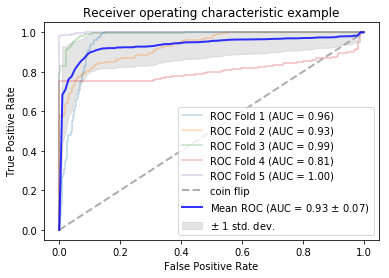

In [11]:
from sklearn.metrics import plot_roc_curve
from scipy import interp
from sklearn.model_selection import StratifiedKFold

## get splits
kfold = KFold(n_splits=5, shuffle=False)

# for means and for interpolation
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

## make C low so we can see different lines
linSVC = LinearSVC(random_state=99, C=.00001)

## plot kfold ROCs
fig, ax = plt.subplots()
for i, (train_ind, test_ind) in enumerate(kfold.split(X_ohe, y_encoded)):
    linSVC.fit(X_ohe_np[train_ind], y_encoded[train_ind])
    viz = plot_roc_curve(linSVC, X_ohe_np[test_ind], y_encoded[test_ind],
                         name=f'ROC Fold {i+1}', alpha=0.3, lw=1.5, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

## plot coin-flip, mean and std
ax.plot([0,1], [0,1], linestyle="--", lw=2, color=(0.6, 0.6, 0.6), label='coin flip', alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        ## $\pm$ means plus/minus
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

## plot labels
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [12]:
##helper functions to repeat roc plots for classifiers

def get_tpr_fpr(y_test, y_pred, TPR, FPR, print_cf=False):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    if print_cf:
        print(confusion_matrix(y_test, y_pred))
    TPR += [tp/(tp+fn)]
    FPR += [fp/(fp+tn)]

def roc_plot(FPR, TPR):
    ## plot the ROC for LinearSVC
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]
    area = auc(fpr, tpr)
    
    # Plot
    fig, ax = plt.subplots()
    plt.plot(fpr, tpr, ':', label='ROC curve (area = %0.2f)' % area)
    plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
    plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

    # Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

For above this is why we set tn, fp, fn, tp order for confusion matrices:
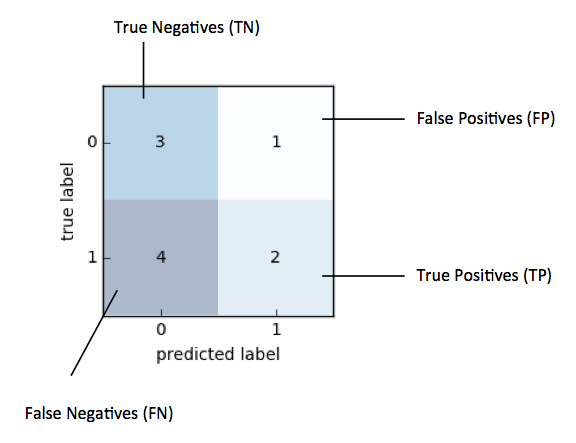

Now let's do SVC  with "rbf" kernel with really low C to start.

Test Accuracy= 0.516, C= 0.00001, gamma= 0.00010, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00001, gamma= 0.00100, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00001, gamma= 0.01000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00001, gamma= 0.10000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00001, gamma= 1.00000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00001, gamma=10.00000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00010, gamma= 0.00010, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00010, gamma= 0.00100, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00010, gamma= 0.01000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00010, gamma= 0.10000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00010, gamma= 1.00000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00010, gamma=10.00000, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00100, gamma= 0.00010, TPR 0.000, FPR 0.000
Test Accuracy= 0.516, C= 0.00100, gamma= 0.00100, TPR 0.000, FPR 0.000
Test A

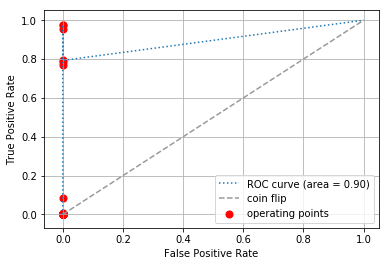

In [13]:
## try kernel = Radial basis function
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_encoded, test_size=.98,
                                                    random_state=99)

FPR, TPR = [], []
C = np.logspace(-5, 1, 7)
gamma = np.logspace(-4, 1, 6)

for c in C:
    for g in gamma:
        classifier = SVC(kernel="rbf", random_state=99, C=c, gamma=g)
        y_pred = classifier.fit(X_train, y_train).predict(X_test)
        get_tpr_fpr(y_test, y_pred, TPR, FPR)
        print(f'Test Accuracy= {classifier.score(X_test, y_test):.3f}, '
              f'C={c:8.5f}, gamma={g:8.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')
roc_plot(FPR, TPR)

This looks a little bit more like an ROC curve.  We never get to 100% unless we used higher C.  Now let's try LogisticRegression.

Test Accuracy= 0.888, C=      0.00001, tol=      0.00010, TPR 0.791, FPR 0.021
Test Accuracy= 0.888, C=      0.00001, tol=     10.00000, TPR 0.791, FPR 0.021
Test Accuracy= 0.888, C=      0.00010, tol=      0.00010, TPR 0.791, FPR 0.021
Test Accuracy= 0.888, C=      0.00010, tol=     10.00000, TPR 0.791, FPR 0.021
Test Accuracy= 0.888, C=      0.00100, tol=      0.00010, TPR 0.791, FPR 0.021
Test Accuracy= 0.888, C=      0.00100, tol=     10.00000, TPR 0.791, FPR 0.021
Test Accuracy= 0.891, C=      0.01000, tol=      0.00010, TPR 0.796, FPR 0.020
Test Accuracy= 0.894, C=      0.01000, tol=     10.00000, TPR 0.805, FPR 0.022
Test Accuracy= 0.957, C=      0.10000, tol=      0.00010, TPR 0.927, FPR 0.015
Test Accuracy= 0.888, C=      0.10000, tol=     10.00000, TPR 0.791, FPR 0.021
Test Accuracy= 0.988, C=      1.00000, tol=      0.00010, TPR 0.976, FPR 0.000
Test Accuracy= 0.926, C=      1.00000, tol=     10.00000, TPR 0.865, FPR 0.018
Test Accuracy= 0.990, C=     10.00000, tol=      0.0

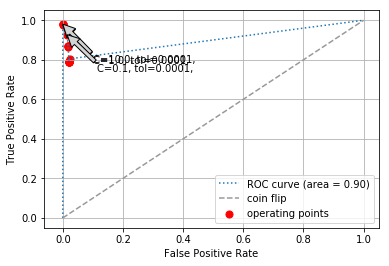

In [14]:
from sklearn.linear_model import LogisticRegression

## new plot function for using multiple labels
def roc_plot_labels(FPR, TPR, labels, hypers, oper_pts):
    ## plot the ROC for LinearSVC
    FPR, TPR, hypers = zip(*sorted(zip(FPR, TPR, np.array([Cs, tols]).T), key=lambda x: x[0]))
    fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]
    area = auc(fpr, tpr)
    # Plot
    fig, ax = plt.subplots()
    plt.plot(fpr, tpr, ':', label='ROC curve (area = %0.2f)' % area)
    plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
    plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')
    
    # annotate
    for i in oper_pts:
        string = ''
        for j, l in enumerate(labels):
            string += f"{l}={hypers[i][j]}, "
        plt.annotate(string, 
                     xy=(FPR[i], TPR[i]), 
                     xytext=(.90*FPR[i]+.1, .80*TPR[i]), 
                     arrowprops=dict(facecolor='lightgray', shrink=1))
    

    # Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

## hyperparamaters
C = np.logspace(-5, 3, 9)
tol = np.logspace(-4, 1, 2)

## to pass to plot function I made
Cs = []
tols = []

FPR, TPR = [], []

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_encoded, test_size=.98,
                                                    random_state=99)

for c in C:
    for t in tol:
        classifier = LogisticRegression(random_state=99, class_weight='balanced',
                                        C=c, tol=t, multi_class='auto', max_iter=10000)
        y_pred = classifier.fit(X_train, y_train).predict(X_test)
        get_tpr_fpr(y_test, y_pred, TPR, FPR)
        accuracy = accuracy_score(y_test, y_pred)
        Cs.append(c); tols.append(t); ## so we can plot labels
        print(f'Test Accuracy= {accuracy:.3f}, C={c:13.5f}, tol={t:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')

roc_plot_labels(FPR, TPR, ["C", "tol"], np.array([Cs, tols]).T, [0, 1, 4])

We reach almost 100% accuracy with  C=1000.0 and tol = 0.0001.

Lastly we will try DecisionTree, RandomForest, and QDA.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# for DecisionTree
max_depths_dt = np.linspace(1, 20, 20)
FPR_DT, TPR_DT = [], []

# for RandomForest
max_depths_rf = np.linspace(1, 20, 4)
num_estimators = np.linspace(1, 1000, 5).astype(int)
FPR_RF, TPR_RF = [], []

# for QDA
tol = np.logspace(-5, 0, 5)
reg_params = np.linspace(0, 1, 4)
FPR_QDA, TPR_QDA = [], []


X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_encoded, test_size=.98,
                                                    random_state=99)

## DecisionTree
print("DecisionTree")
for md in max_depths_dt:
    classifier = DecisionTreeClassifier(random_state=99, max_depth=md)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    get_tpr_fpr(y_test, y_pred, TPR_DT, FPR_DT)    
    print(f'Test Accuracy= {classifier.score(X_test, y_test):.3f}, ' 
          f'Max_depth={md:10.5f}, TPR {TPR_DT[-1]:.3f}, FPR {FPR_DT[-1]:.3f}')

## RandomForest
print("\nRandomForest")
for md in max_depths_rf:
    for n in num_estimators:
        classifier = RandomForestClassifier(random_state=99, max_depth=md, n_estimators=n)
        y_pred = classifier.fit(X_train, y_train).predict(X_test)
        get_tpr_fpr(y_test, y_pred, TPR_RF, FPR_RF) 
        print(f'Test Accuracy= {classifier.score(X_test, y_test):.3f}, '
              f'Max_depth={md:10.5f}, Num_estimators={float(n):13.5f} TPR {TPR_RF[-1]:.3f}, FPR {FPR_RF[-1]:.3f}')
        
# for QDA
print("\nQDA")
for t in tol:
    for r in reg_params:
        classifier = QuadraticDiscriminantAnalysis(tol=t, reg_param=r)
        y_pred = classifier.fit(X_train, y_train).predict(X_test)
        get_tpr_fpr(y_test, y_pred, TPR_QDA, FPR_QDA) 
        print(f'Test Accuracy= {classifier.score(X_test, y_test):.3f}, \
              Tol={t:13.5f}, Regulation_params={float(r):13.5f} TPR {TPR_RF[-1]:.3f}, FPR {FPR_RF[-1]:.3f}')

DecisionTree
Test Accuracy= 0.887, Max_depth=   1.00000, TPR 0.970, FPR 0.191
Test Accuracy= 0.927, Max_depth=   2.00000, TPR 0.848, FPR 0.000
Test Accuracy= 0.960, Max_depth=   3.00000, TPR 0.918, FPR 0.000
Test Accuracy= 0.966, Max_depth=   4.00000, TPR 0.930, FPR 0.001
Test Accuracy= 0.983, Max_depth=   5.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=   6.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=   7.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=   8.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=   9.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=  10.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=  11.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=  12.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=  13.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=  14.00000, TPR 0.964, FPR 0.000
Test Accuracy= 0.983, Max_depth=  15.00000, TPR 0.964, FPR 0.000
Test Accurac

C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.521,               Tol=      0.00001, Regulation_params=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.610,               Tol=      0.00001, Regulation_params=      0.66667 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.796,               Tol=      0.00001, Regulation_params=      1.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.994,               Tol=      0.00018, Regulation_params=      0.00000 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.521,               Tol=      0.00018, Regulation_params=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.610,               Tol=      0.00018, Regulation_params=      0.66667 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.796,               Tol=      0.00018, Regulation_params=      1.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.994,               Tol=      0.00316, Regulation_params=      0.00000 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.521,               Tol=      0.00316, Regulation_params=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.610,               Tol=      0.00316, Regulation_params=      0.66667 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.796,               Tol=      0.00316, Regulation_params=      1.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.994,               Tol=      0.05623, Regulation_params=      0.00000 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.521,               Tol=      0.05623, Regulation_params=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.610,               Tol=      0.05623, Regulation_params=      0.66667 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.796,               Tol=      0.05623, Regulation_params=      1.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.994,               Tol=      1.00000, Regulation_params=      0.00000 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.521,               Tol=      1.00000, Regulation_params=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.610,               Tol=      1.00000, Regulation_params=      0.66667 TPR 0.978, FPR 0.000


C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Test Accuracy= 0.796,               Tol=      1.00000, Regulation_params=      1.00000 TPR 0.978, FPR 0.000


#### Then we plot them.  We will see we get really accurate once we go into more depth in the trees.  QDA is high most of the time for categorical data because the data features normally have linear multiples of each other when encode them.  

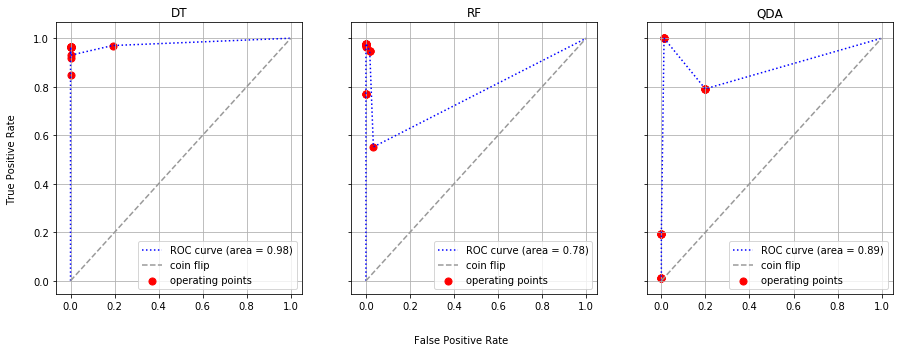

In [16]:
## plot DecisionTree, RandomForest & QDA

def roc_plot_mult(FPR, TPR, ax, title):
    ## plot the ROC for LinearSVC
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]
    area = auc(fpr, tpr)
    
    # Plot
    ax.plot(fpr, tpr, ':', color='b', label='ROC curve (area = %0.2f)' % area)
    ax.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
    ax.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

    # Labels
    ax.set_title(title)
    ax.legend(loc="lower right")
    ax.grid()

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
titles = ['DT', 'RF', 'QDA']

roc_plot_mult(FPR_DT, TPR_DT, ax[0], titles[0])
roc_plot_mult(FPR_RF, TPR_RF, ax[1], titles[1])
roc_plot_mult(FPR_QDA, TPR_QDA, ax[2], titles[2])

handles, labels = ax[0].get_legend_handles_labels()

fig.text(0.5, -0.01, 'False Positive Rate', ha='center')
fig.text(0.08, 0.5, 'True Positive Rate', va='center', rotation='vertical')
plt.show()

#### Correlations are not extremely high but high enough to cause collinearity for QDA.

In [17]:
# need to make dataframe on the categorical float version of X
X_encoded_df = pd.DataFrame(X_encoded)

##
corr_mat = X_encoded_df.corr().abs()
print(corr_mat.head())
print("\nMax correlations for each variable with another variable other than itself:\n", corr_mat[corr_mat < 1].max())

         0         1         2         3         4         5         6   \
0  1.000000  0.050454  0.048203  0.035374  0.021935  0.078865  0.013196   
1  0.050454  1.000000  0.019402  0.070228  0.045233  0.034180  0.282306   
2  0.048203  0.019402  1.000000  0.000764  0.387121  0.041436  0.144259   
3  0.035374  0.070228  0.000764  1.000000  0.061825  0.137359  0.299473   
4  0.021935  0.045233  0.387121  0.061825  1.000000  0.059590  0.063936   

         7         8         9     ...           12        13        14  15  \
0  0.054050  0.006039  0.063794    ...     0.032591  0.031659  0.030390 NaN   
1  0.208100  0.161017  0.014123    ...     0.107965  0.066050  0.068885 NaN   
2  0.169464  0.084659  0.456496    ...     0.047710  0.002364  0.008057 NaN   
3  0.369596  0.527120  0.099364    ...     0.458983  0.083538  0.092874 NaN   
4  0.310495  0.129213  0.459766    ...     0.061820  0.174532  0.169407 NaN   

         16        17        18        19        20        21  
0  0.07256

#### I saw online you can perform PCA to get rid of the collinearity but not sure of the implications.  All the accuracies are now around 90%.

In [18]:
## I heard PCA would get rid of collinearity if components is low enough
from sklearn.decomposition import PCA

X_ohe_drop_first = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_ohe_drop_first, y_encoded, test_size=.98,
                                                    random_state=99)

print("\nQDA")
for t in tol:
    for r in reg_params:
        classifier = make_pipeline(PCA(n_components=5),
                                   QuadraticDiscriminantAnalysis(tol=t, reg_param=r))
        y_pred = classifier.fit(X_train, y_train).predict(X_test)
        get_tpr_fpr(y_test, y_pred, TPR_QDA, FPR_QDA) 
        print(f'Test Accuracy= {classifier.score(X_test, y_test):.3f}, \
              Tol={t:13.5f}, Regul_param={float(r):13.5f} TPR {TPR_RF[-1]:.3f}, FPR {FPR_RF[-1]:.3f}')
            


QDA
Test Accuracy= 0.906,               Tol=      0.00001, Regul_param=      0.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.893,               Tol=      0.00001, Regul_param=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.894,               Tol=      0.00001, Regul_param=      0.66667 TPR 0.978, FPR 0.000
Test Accuracy= 0.895,               Tol=      0.00001, Regul_param=      1.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.906,               Tol=      0.00018, Regul_param=      0.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.893,               Tol=      0.00018, Regul_param=      0.33333 TPR 0.978, FPR 0.000
Test Accuracy= 0.894,               Tol=      0.00018, Regul_param=      0.66667 TPR 0.978, FPR 0.000
Test Accuracy= 0.895,               Tol=      0.00018, Regul_param=      1.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.906,               Tol=      0.00316, Regul_param=      0.00000 TPR 0.978, FPR 0.000
Test Accuracy= 0.893,               Tol=      0.00316, Regul_param=      0.33

__2. [10 pts] What kind of behavior would you expect to see in Pd – Pf interaction of an ROC
plot? Do you see it in yours?__

I have not seen much using ROC curves to test different hyperparameters.  It seems the industry mostly uses ROC curves for thresholds as I did for the example above from the sklearn website that I modified for LinearSVC.  Typically when plotting the ROC the thresholds are sorted from largest to smallest.  I have consistently see that when thresholds are large both TPR and FPR are small.  Then we we start iterating through thresholds we eventually find an optimal one closes to the point (0,1) which means perfect accuracy and then as the threshold

__3. [20 pts] From the ROC plot that you created make a selection of the classifier and hyperparameter setting for this problem. Note that we are classifying mushrooms so your conclusion might be subjective but has to be supported by your findings.__

Basically use just the standard Sklearn classifiers we will get near 100%.  I will perform the classifier defaults to train only 2% of the data and then give results on the remaining 98% to validate.




In [19]:
df = pd.read_csv("assignment04_mushroom_dataset.csv")

X = df.loc[:, df.columns != 'class']
y = df.loc[:, df.columns == 'class']

## encode target (0 : E, 1: P)
encoder_y = OrdinalEncoder()
encoder_y.fit(y)
y_encoded = encoder_y.transform(y).ravel()

## OneHotEncode X
X_o = pd.get_dummies(X, drop_first=True)

print(y_encoded[:5])
X_o.head()

[1. 0. 0. 1. 0.]


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat _g,habitat _l,habitat _m,habitat _p,habitat _u,habitat _w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
classifiers_ = ['LinearSVC', 'SVC (rbf)', 'LogisticRegression', 'DecisionTreeClassifier',
                'RandomForestClassifier', 'QuadraticDiscriminantAnalysis']

classifiers = [LinearSVC(random_state=99),
               SVC(random_state=99),
               LogisticRegression(random_state=99),
               DecisionTreeClassifier(random_state=99),
               RandomForestClassifier(random_state=99),
               QuadraticDiscriminantAnalysis()
              ]

for i, c in enumerate(classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X_o, y_encoded, test_size=.98, random_state=99)

    y_pred = c.fit(X_train, y_train).predict(X_test)
    get_tpr_fpr(y_test, y_pred, TPR_DT, FPR_DT)  
    print(classifiers_[i])
    print(f'Test Accuracy= {c.score(X_test, y_test):.3f}, TPR {TPR_DT[-1]:.3f}, FPR {FPR_DT[-1]:.3f}')
    print(confusion_matrix(y_test, y_pred))
    print()

LinearSVC
Test Accuracy= 0.992, TPR 0.983, FPR 0.000
[[4111    0]
 [  65 3786]]

SVC (rbf)
Test Accuracy= 0.948, TPR 0.893, FPR 0.000
[[4111    0]
 [ 411 3440]]

LogisticRegression
Test Accuracy= 0.982, TPR 0.962, FPR 0.000
[[4111    0]
 [ 145 3706]]

DecisionTreeClassifier
Test Accuracy= 0.986, TPR 0.971, FPR 0.000
[[4111    0]
 [ 112 3739]]

RandomForestClassifier
Test Accuracy= 0.978, TPR 0.954, FPR 0.000
[[4111    0]
 [ 177 3674]]

QuadraticDiscriminantAnalysis
Test Accuracy= 0.996, TPR 1.000, FPR 0.007
[[4081   30]
 [   0 3851]]



C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Even with default hyperparameters 4 out of 6 classifiers get 98-99% accuracy.  We can't really make DecisionTreeClassifier any better since we max out the depths with the default.  We can make RandomForestClassifier better by increase the estimator by 50 fold or so but this is only a modest increase.

In [21]:
classifiers = [LinearSVC(C=100, max_iter=100000, random_state=99),
               SVC(C=100, gamma=.01, random_state=99),
               LogisticRegression(C=100, random_state=99),
               DecisionTreeClassifier(random_state=99),
               RandomForestClassifier(n_estimators=500, random_state=99),
               QuadraticDiscriminantAnalysis(tol=10.0)
              ]

for i, c in enumerate(classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X_o, y_encoded, test_size=.98, random_state=99)

    y_pred = c.fit(X_train, y_train).predict(X_test)
    get_tpr_fpr(y_test, y_pred, TPR_DT, FPR_DT)  
    print(classifiers_[i])
    print(f'Test Accuracy= {c.score(X_test, y_test):.3f}, TPR {TPR_DT[-1]:.3f}, FPR {FPR_DT[-1]:.3f}')
    print(confusion_matrix(y_test, y_pred))
    print()

LinearSVC
Test Accuracy= 0.993, TPR 0.985, FPR 0.000
[[4111    0]
 [  58 3793]]

SVC (rbf)
Test Accuracy= 0.990, TPR 0.980, FPR 0.000
[[4111    0]
 [  78 3773]]

LogisticRegression
Test Accuracy= 0.990, TPR 0.980, FPR 0.000
[[4111    0]
 [  78 3773]]

DecisionTreeClassifier
Test Accuracy= 0.986, TPR 0.971, FPR 0.000
[[4111    0]
 [ 112 3739]]

RandomForestClassifier
Test Accuracy= 0.983, TPR 0.966, FPR 0.000
[[4111    0]
 [ 132 3719]]

QuadraticDiscriminantAnalysis
Test Accuracy= 0.996, TPR 1.000, FPR 0.007
[[4081   30]
 [   0 3851]]



C:\Users\bjwil\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
